# Project 2  Bipartite Network

## By Team Vac

### Introduction

Let's explore a bipartite network, or commonly referred as a two mode network. First, a Bipartite network is one where there are at least two types of nodes where their connections are based on the primary node connection. In short, nodes of one set can only be transverse if they share the same connection to a node of the other set. 

We selected Pajek's Divorce Network for our analysis. For some background, Pajek's divorce network is made up state node set and a reason node set. The state nodes are comprise of US's 50 states and the law nodes are the divorce laws supported based on the reasons for seperation. Their connection represent if the US state has a the specific divorce law in placed based on the reason of seperation. In order to use this dataset, there was translation from the .net file into a .edgelist viewed [here](https://github.com/Vy4thewin/Data620_TeamVAC/blob/main/generate_edgelist.py). After the .edgelist tranformation, we can import the 2 mode network with the bipartite function. Let's view how the network looks below!

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from networkx.algorithms import bipartite

#Loading in the divorce network
divorce=bipartite.read_edgelist("divorce.edgelist",delimiter=",",nodetype=str)

#Seperating the two node sets into their groupings
states, causes = bipartite.sets(divorce)

#Lets check that the two sets were seperated correctly
list(states)
list(causes)

['felony',
 'cruelty',
 'incompat',
 'impotenc',
 'insanity',
 'nonsupp',
 'alcohol',
 'separate',
 'desertn']

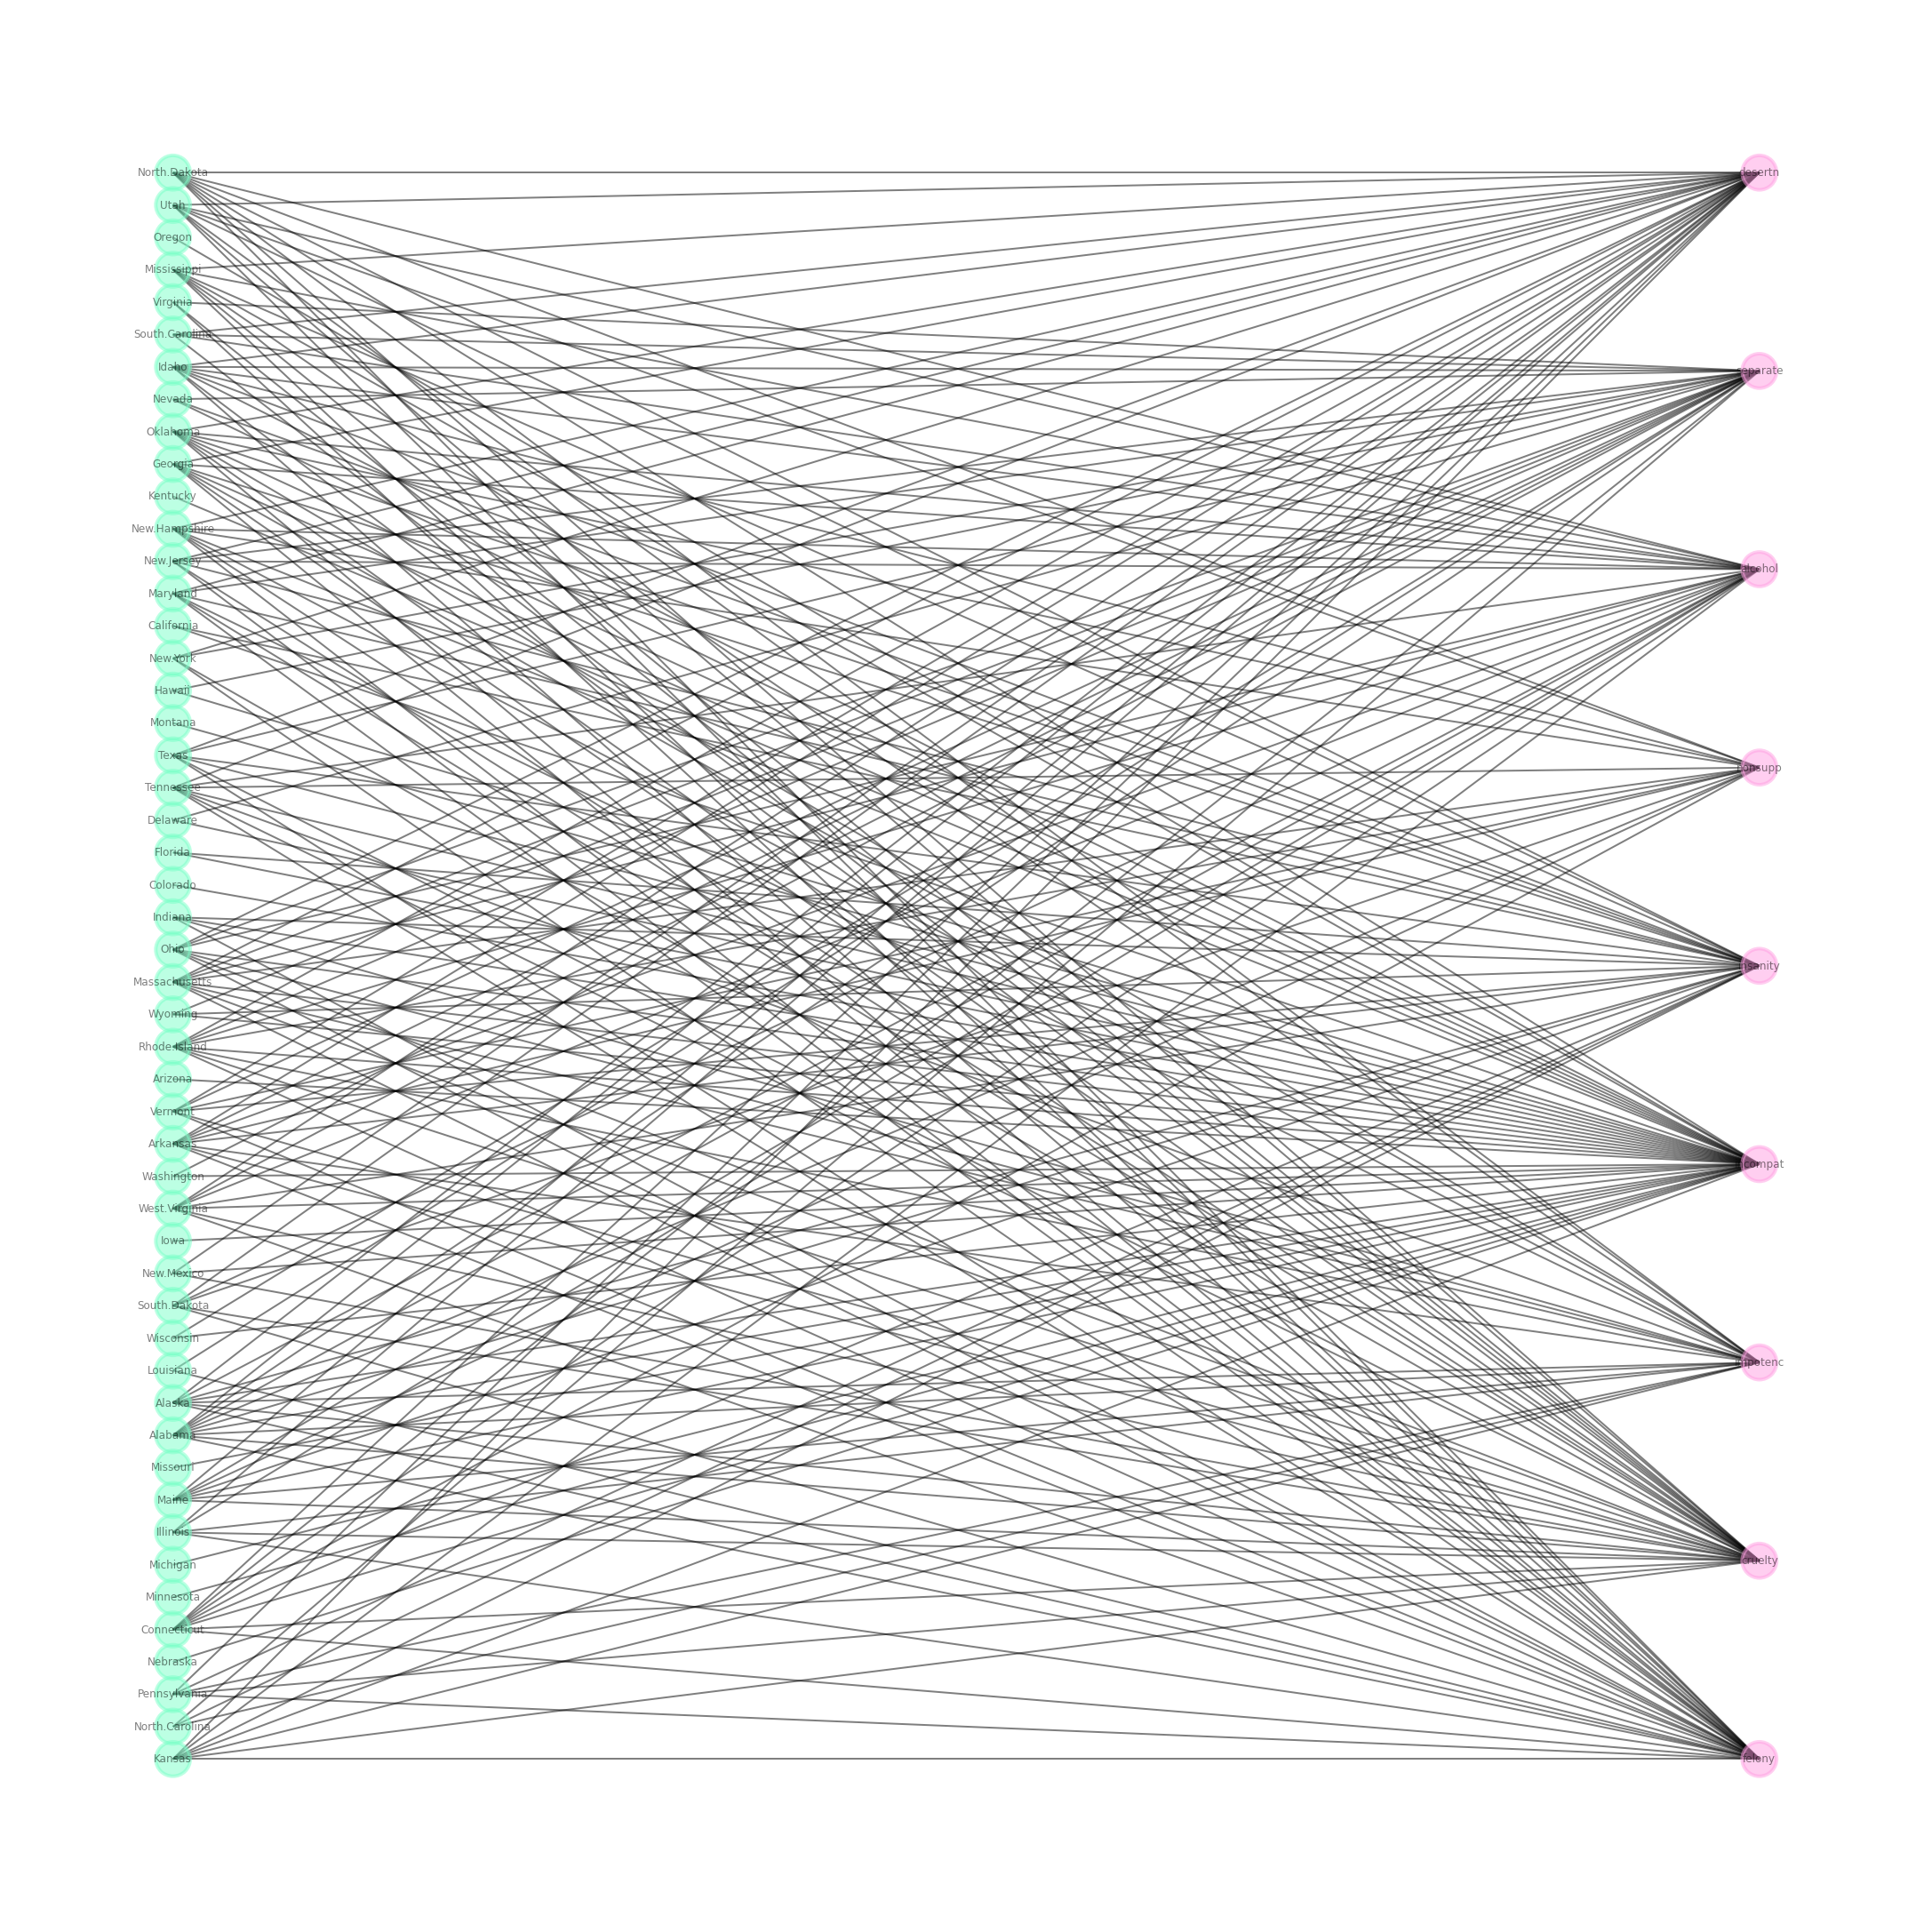

In [15]:
#Lets see what the system grabbed as the node set for reference
values=bipartite.color(divorce)

#States received set 1 and legal causes were set 2
nodes_family={0:'#7affc8',1:'#ff9ee2'}
nodes_colors=[nodes_family[i[1]] for i in divorce.nodes.data('bipartite')]

#Lets create a visual of the network
pos=nx.bipartite_layout(divorce,states)
plt.figure(figsize=(30, 30))
nx.draw(divorce,with_labels=True,node_size=1500,node_shape="o" ,alpha=0.5 ,linewidths=4, width=2,node_color=nodes_colors,pos=pos)
plt.show()


### Limiting down the network scope

From our original pull, the network has a lot of connections and will make it a diffcult process to see the largest majority in law legal cause for a seperation. In order to shrink down our scope, we enact the island method from chapter 4. Our network did not have edge weight as a factor with the network, so we used a projection method offered by networkx to apply weights. We selected Networkx's bipartite collaboration weighted projected graph function, which creates a weigth edges based on the Newman's model. The function will take in the bottom nodes, which are our "states" and project a predicted weight based on its degree.

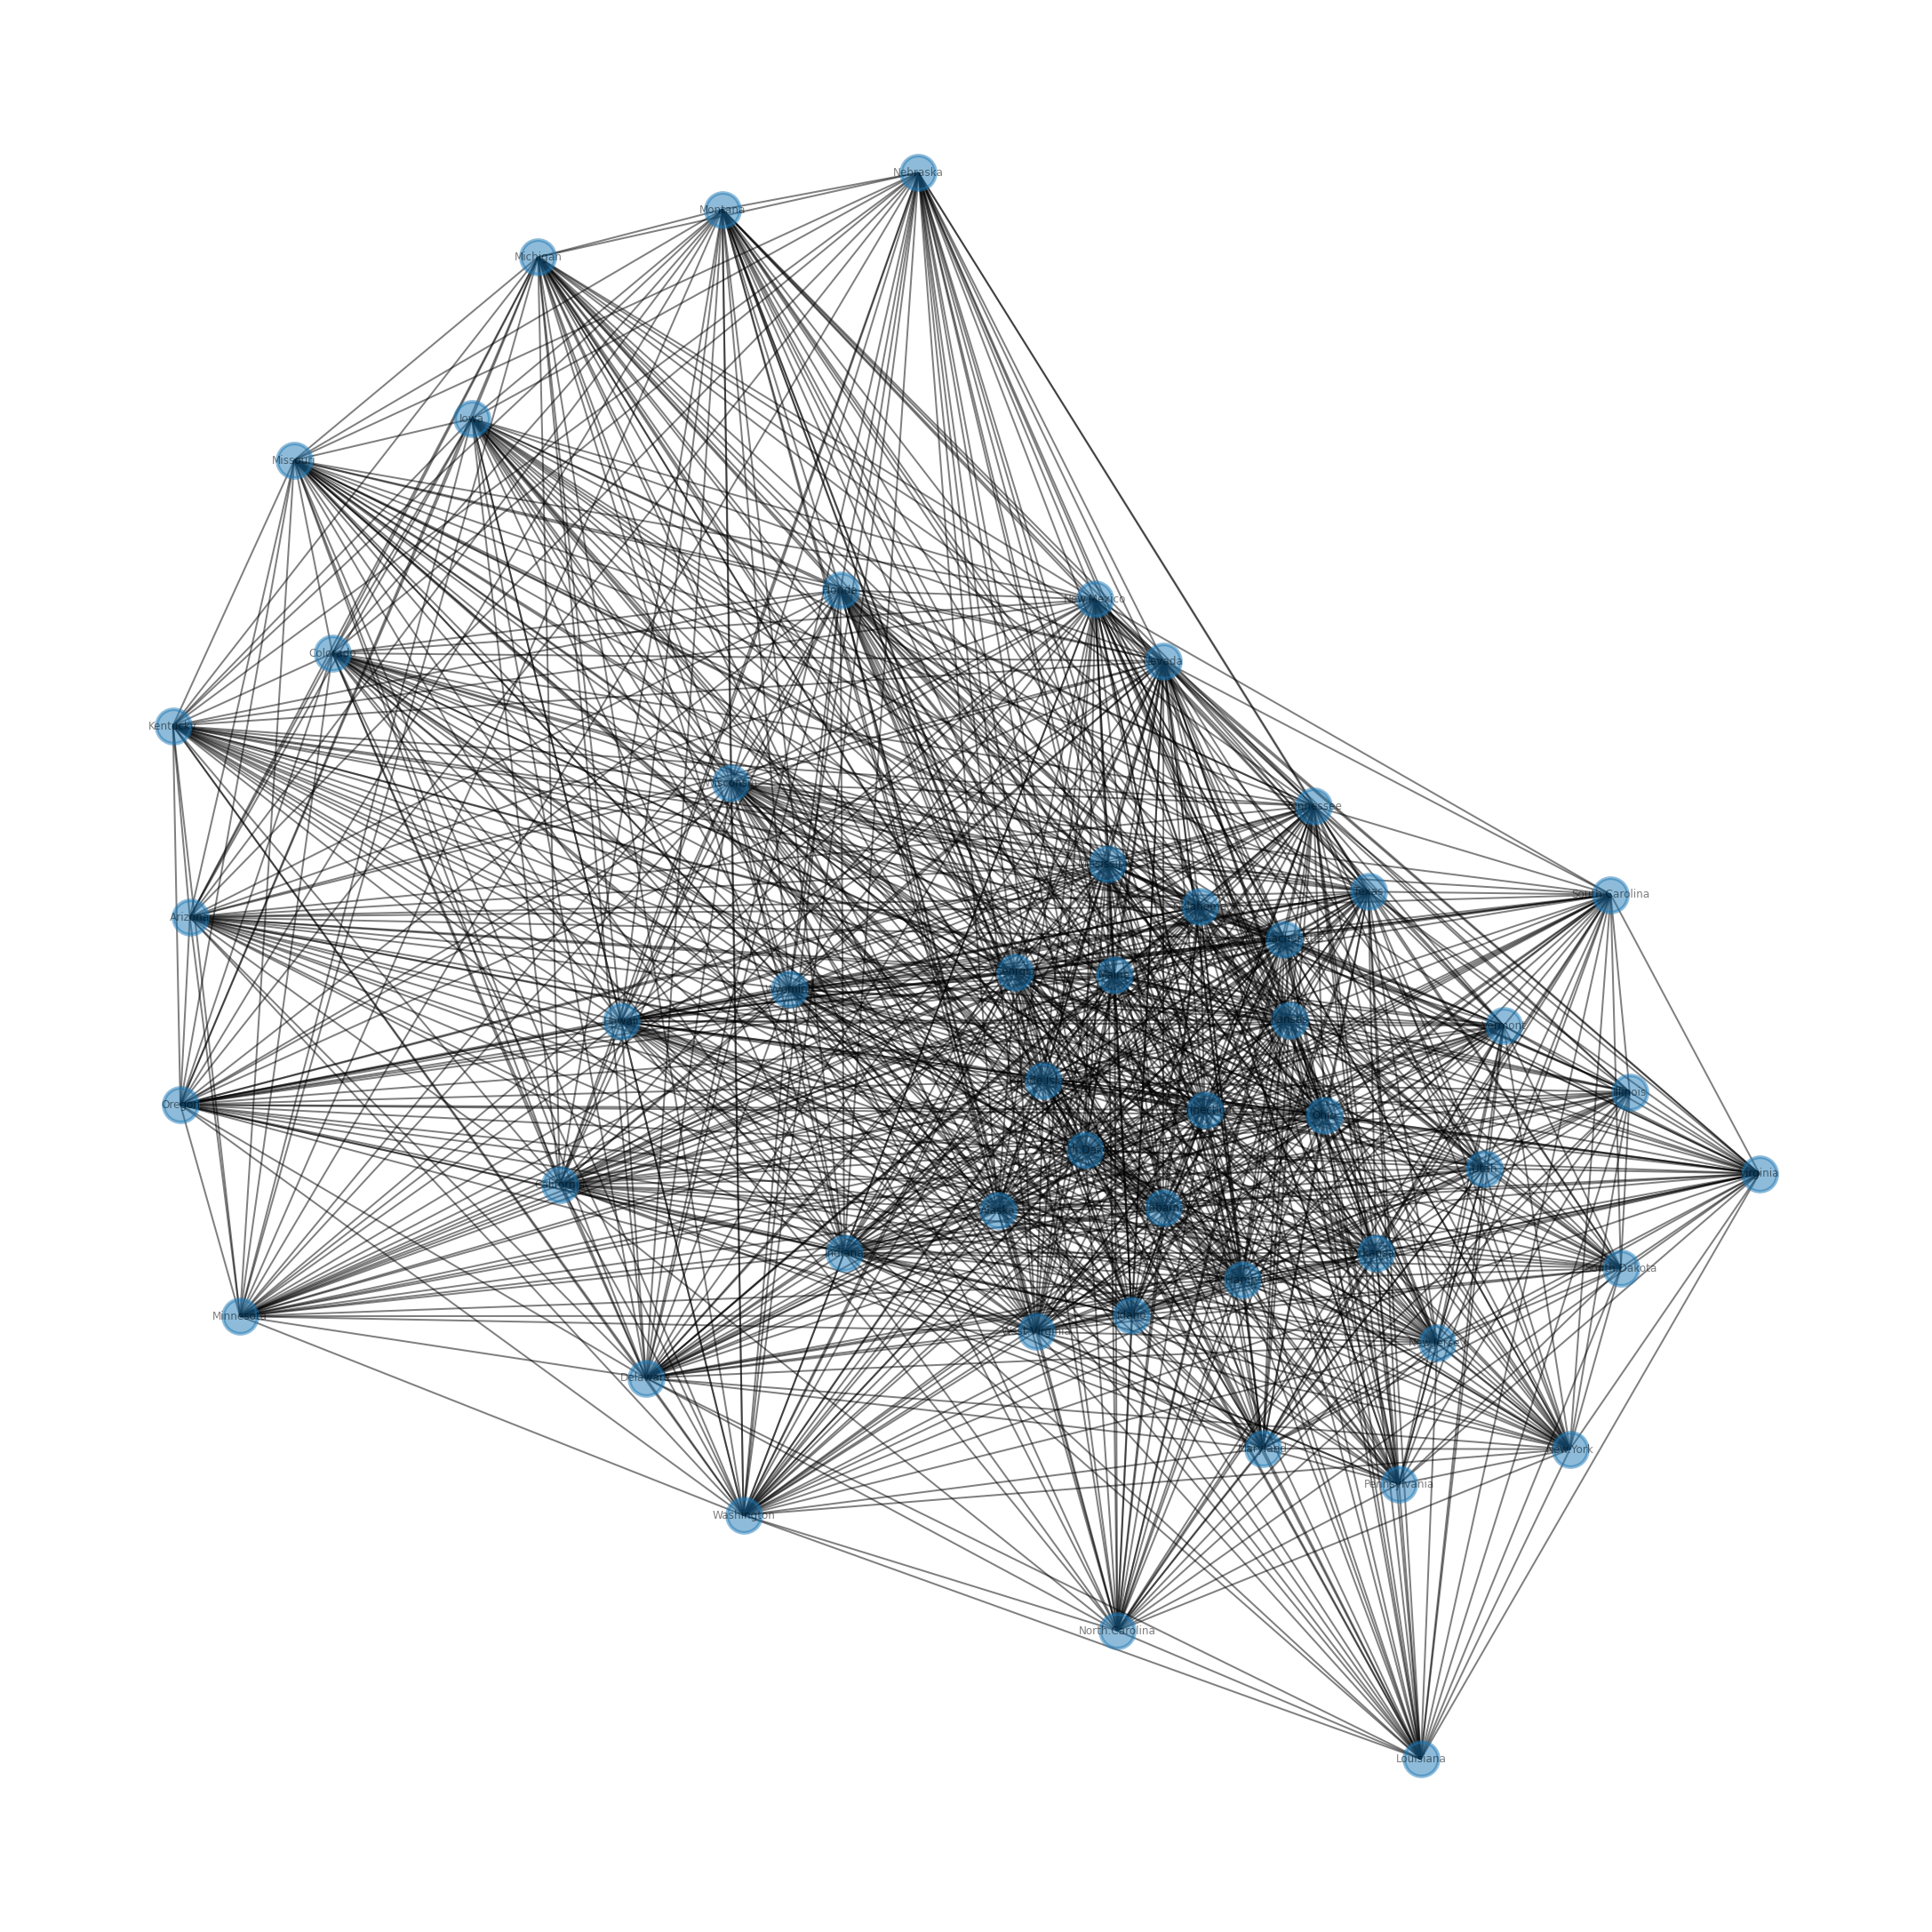

In [32]:
#Adding weights with the function below
wght_divorce=bipartite.collaboration_weighted_projected_graph(divorce,states)

#Let's view the weigthed network
pos=nx.bipartite_layout(divorce,states)
plt.figure(figsize=(30, 30))
nx.draw(divorce,with_labels=True,node_size=1500,node_shape="o" ,alpha=0.5 ,linewidths=4, width=2,node_color=nodes_colors,pos=pos)
plt.show()


### Island Method of network reduction

We can now reduce the network's size with our own edge trimming function. We decided to limit down the number of nodes whose weigths are greater than five. Now, the network only has states with the most connections within the orginal network.

In [47]:
#filtering out the nodes with small weights in the network
small_net=[(u,v,d) for (u,v,d) in wght_divorce.edges(data=True) if d["weight"] > 0.3]
small_G=wght_divorce.subgraph(small_net)



NetworkXError: Node ('Connecticut', 'Alabama', {'weight': 0.3510410684323728}) in sequence nbunch is not a valid node.